In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [220]:
df= pd.read_csv(r"C:\Users\bvssh\Downloads\Sales Data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


##  Sales Data Overview
This dataset contains sales transaction records, including:
- **Order ID**: Unique identifier for each order
- **Product**: Name of the purchased product
- **Quantity Ordered**: Number of units sold
- **Price Each**: Price per unit
- **Order Date**: Date and time of the transaction
- **Purchase Address**: Address where the order was placed
- **Month**: Extracted month from the order date
- **Sales**: Computed total revenue for each order
- **City**: Extracted city from the purchase address
- **Hour**: Extracted city from the Order Date

In [10]:
df.shape

(185950, 10)

#### This step is performed to know the shape of the dataset

In [14]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

#### This step is used to know if there are any missing values in the dataset and in this dataset there is no missing values in any columns

In [125]:
df.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

#### - dtypes is used to know the datatype of each column
#### - Here date is in string type we need to change it to datetime format

In [18]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Sales                      float64
City                        object
Hour                         int64
dtype: object

In [28]:
df.describe()

,Order ID,Quantity Ordered,Price Each,Order Date,Month,Sales,Hour,Year
count,185950.000000,185950.000000,185950.000000,185950,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,2019-07-18 21:54:38.887550464,7.059140,185.490917,14.413305,2019.000183
min,141234.000000,1.000000,2.990000,2019-01-01 03:07:00,1.000000,2.990000,0.000000,2019.000000
25%,185831.250000,1.000000,11.950000,2019-04-16 21:05:15,4.000000,11.950000,11.000000,2019.000000
50%,230367.500000,1.000000,14.950000,2019-07-17 20:40:30,7.000000,14.950000,15.000000,2019.000000
75%,275035.750000,1.000000,150.000000,2019-10-26 08:14:00,10.000000,150.000000,19.000000,2019.000000
max,319670.000000,9.000000,1700.000000,2020-01-01 05:13:00,12.000000,3400.000000,23.000000,2020.000000
std,51512.737110,0.442793,332.731330,NaN,3.502996,332.919771,5.423416,0.013521


In [30]:
df.describe(include = 'object')

,Product,Purchase Address,City
count,185950,185950,185950
unique,19,140787,9
top,USB-C Charging Cable,"193 Forest St, San Francisco, CA 94016",San Francisco
freq,21903,9,44732


##  Descriptive Statistics
The dataset was analyzed to get summary statistics:
- **Total transactions**: 185,950
- **Average quantity ordered per transaction**: 1.12
- **Average sales per transaction**: $185.49
- **Most frequently purchased product**: USB-C Charging Cable (21,903 times)
- **City with the highest transactions**: San Francisco

## Histogram of Numeric Columns to know how data is distributed 

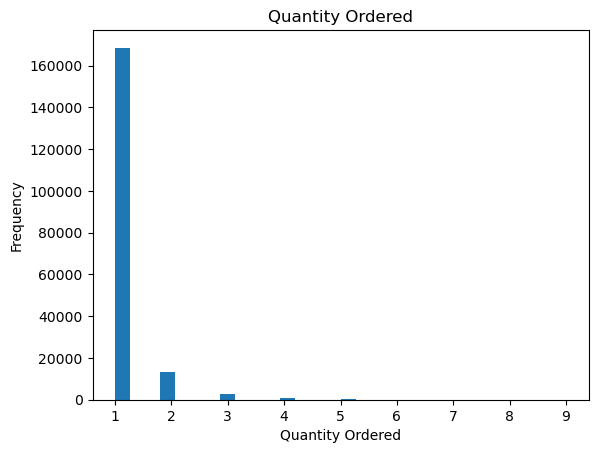

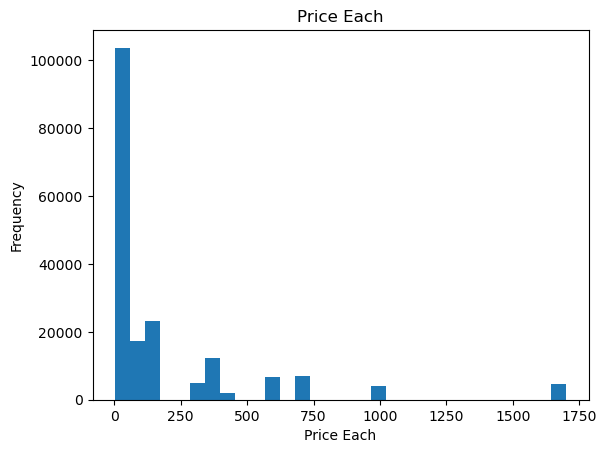

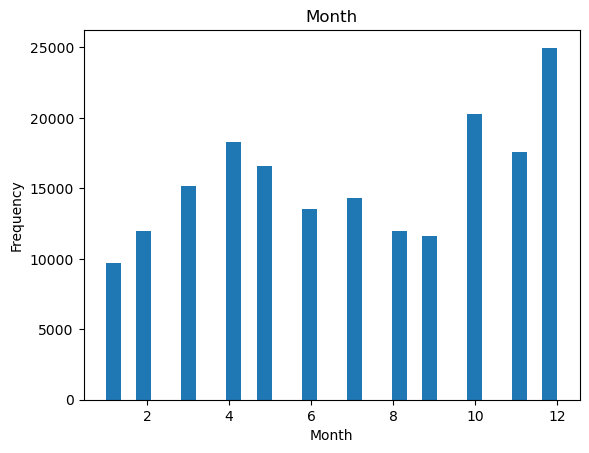

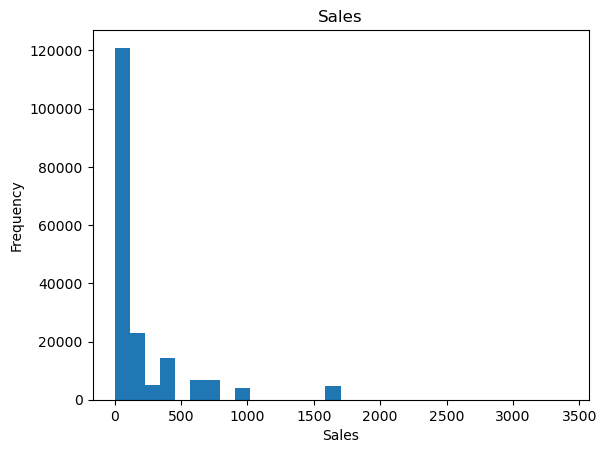

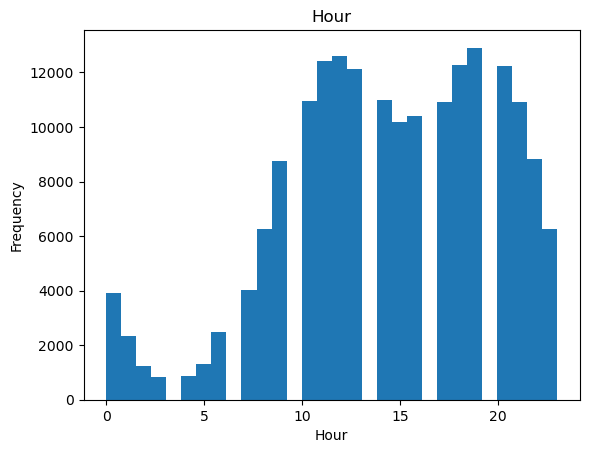

In [242]:
sales_columns =['Quantity Ordered', 'Price Each','Month','Sales', 'Hour']
for col in sales_columns :
 plt.hist(df[col], bins=30)
 plt.xlabel(f"{col}")
 plt.ylabel("Frequency")
 plt.title(f"{col}")
 plt.show()

In [64]:
most_sold = (
    df.groupby('Product')['Quantity Ordered']
      .sum()
      .reset_index().sort_values('Quantity Ordered', ascending=False)

)

most_sold.head(10)


,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


##  Best-Selling Products
The top five best-selling products by quantity are:
1. AAA Batteries (4-pack) - 31,017 units
2. AA Batteries (4-pack) - 27,635 units
3. USB-C Charging Cable - 23,975 units
4. Lightning Charging Cable - 23,217 units
5. Wired Headphones - 20,557 units

### Findings:
- Accessories such as charging cables and headphones dominate sales volume.
- Batteries are among the most frequently purchased items, suggesting demand for frequently used  electronicsrun with batteries

In [41]:
Monthly_highest_sales = df.groupby('Month')['Sales'].sum().reset_index().sort_values('Month',ascending= False)
Monthly_highest_sales

,Month,Sales
11,12,4613443.34
10,11,3199603.20
9,10,3736726.88
8,9,2097560.13
7,8,2244467.88
6,7,2647775.76
5,6,2577802.26
4,5,3152606.75
3,4,3390670.24
2,3,2807100.38


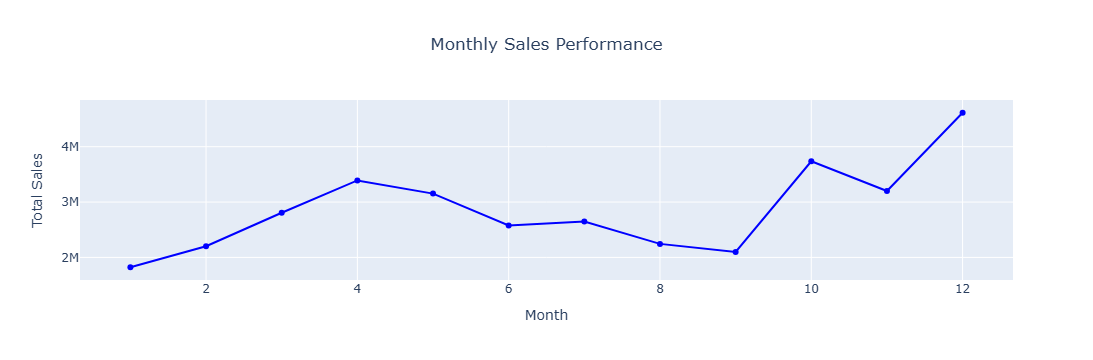

In [56]:
import plotly.express as px

fig = px.line(Monthly_highest_sales, 
              x='Month', 
              y='Sales', 
              title="Monthly Sales Performance", 
              markers=True,  
              line_shape='linear',  
              color_discrete_sequence=['blue'])  


fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Total Sales",
    title_x=0.5  )
fig.show()



##  Sales Trend by Month
The monthly sales distribution is as follows:
- **December** had the highest revenue: **$4.61M**
  
- **November**  followed with **$3.19M**
  
- **October** had **$3.73M**
### Findings:
- December saw the highest sales, likely due to holiday season shopping.
- A steady increase in sales was observed during holiday season.

In [54]:
Highest_selling_product = df.groupby('Product')['Sales'].sum().reset_index().sort_values('Product', ascending=False)
Highest_selling_product.head(10)

,Product,Sales
18,iPhone,4794300.00
17,Wired Headphones,246478.43
16,Vareebadd Phone,827200.00
15,USB-C Charging Cable,286501.25
14,ThinkPad Laptop,4129958.70
13,Macbook Pro Laptop,8037600.00
12,Lightning Charging Cable,347094.15
11,LG Washing Machine,399600.00
10,LG Dryer,387600.00
9,Google Phone,3319200.00


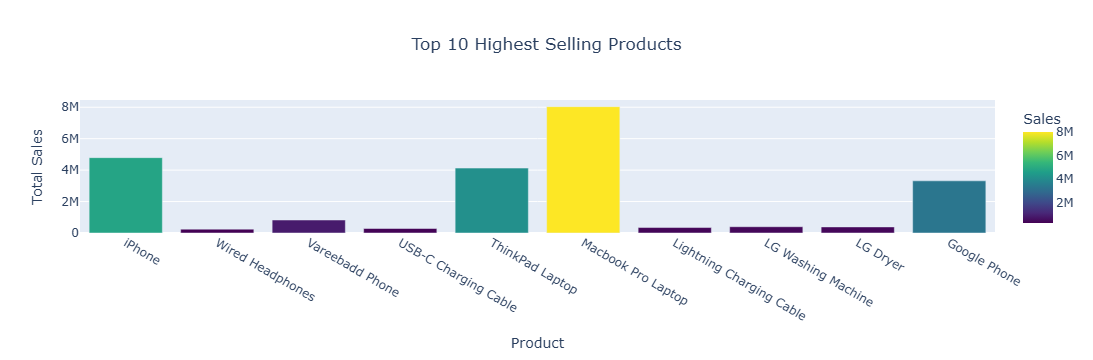

In [133]:
import plotly.express as px

# Creating bar plot
fig = px.bar(Highest_selling_product.head(10), 
             x='Product', 
             y='Sales', 
             color='Sales', 
             color_continuous_scale='Viridis',
             title="Top 10 Highest Selling Products")

fig.update_layout(
    xaxis_title="Product",
    yaxis_title="Total Sales",
    title_x=0.5  # Center the title
)

fig.show()


##  Revenue by Product
The top-grossing products are:
1. **iPhone** - $4.79M
   
2. **ThinkPad Laptop** - $4.13M

3. **Macbook Pro Laptop** - $3.13M

4. **Google Phone** - $2.83M

5. **Vareebadd Phone** - $827K

### Findings:
- High-end electronic devices generate the most revenue despite selling fewer quantity.
- Smartphones and laptops are top revenue contributors as there cost is high

In [81]:
from itertools import combinations
from collections import Counter
order_product_groups = df.groupby('Order ID')['Product'].apply(list)

# Step 2: Count combinations of products that appear together
product_combinations = Counter()

for products in order_product_groups:
    if len(products) > 1:  # Only consider orders with multiple products
        for combo in combinations(sorted(products), 2):  # Get all 2-item combinations
            product_combinations[combo] += 1

product_combinations

Counter({('Lightning Charging Cable', 'iPhone'): 1015,
         ('Google Phone', 'USB-C Charging Cable'): 999,
         ('Wired Headphones', 'iPhone'): 462,
         ('Google Phone', 'Wired Headphones'): 423,
         ('Apple Airpods Headphones', 'iPhone'): 373,
         ('USB-C Charging Cable', 'Vareebadd Phone'): 368,
         ('Bose SoundSport Headphones', 'Google Phone'): 228,
         ('USB-C Charging Cable', 'Wired Headphones'): 205,
         ('Vareebadd Phone', 'Wired Headphones'): 149,
         ('Lightning Charging Cable', 'Wired Headphones'): 129,
         ('Apple Airpods Headphones', 'Lightning Charging Cable'): 116,
         ('AA Batteries (4-pack)', 'Lightning Charging Cable'): 106,
         ('Bose SoundSport Headphones', 'USB-C Charging Cable'): 102,
         ('Apple Airpods Headphones', 'Wired Headphones'): 100,
         ('Lightning Charging Cable', 'USB-C Charging Cable'): 100,
         ('AAA Batteries (4-pack)', 'USB-C Charging Cable'): 95,
         ('AA Batteries (4-pa

In [143]:
# Convert product_combinations dictionary to DataFrame
products_brought_together_df = pd.DataFrame(product_combinations.items(), columns=['Product Pair', 'Count'])

products_brought_together_df.sort_values(by ='Count' , ascending= False)


,Product Pair,Count
11,"(Lightning Charging Cable, iPhone)",1015
3,"(Google Phone, USB-C Charging Cable)",999
8,"(Wired Headphones, iPhone)",462
17,"(Google Phone, Wired Headphones)",423
5,"(Apple Airpods Headphones, iPhone)",373
...,...,...
163,"(27in FHD Monitor, LG Washing Machine)",1
161,"(LG Dryer, Wired Headphones)",1
142,"(Google Phone, LG Dryer)",1
158,"(34in Ultrawide Monitor, LG Washing Machine)",1


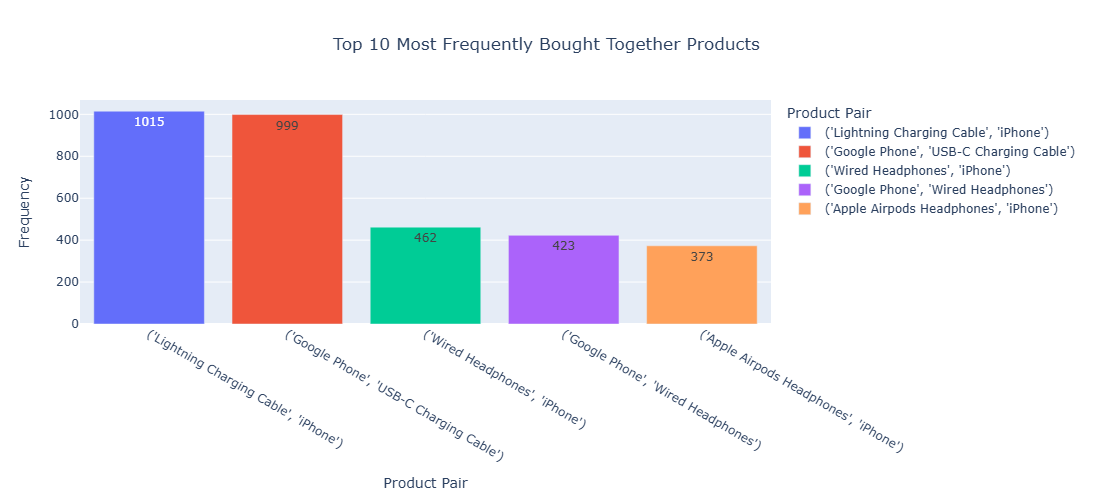

In [123]:
# Sort by count (highest first) and take top 10 pairs
top_pairs = products_brought_together_df.sort_values(by='Count', ascending=False).head(5)
top_pairs['Product Pair'] = top_pairs['Product Pair'].astype(str)


fig = px.bar(top_pairs, 
             x='Product Pair', 
             y='Count', 
             title="Top 10 Most Frequently Bought Together Products",
             color='Product Pair',
            text='Count')

fig.update_layout(
    xaxis_title="Product Pair",
    yaxis_title="Frequency",
    title_x=0.5,
    width=1000, 
    height=500 
)

fig.show()

##  Frequently Purchased Product Pairs
Common product pairs purchased together include:
1. **Lightning Charging Cable & iPhone** - 1,015 times

2. **Google Phone & USB-C Charging Cable** - 999 times

3. **Wired Headphones & iPhone** - 462 times

### Findings:
- Customers often buy accessories with smartphones like chargers, headphones etc.
- This data can help with bundling recommendations to boost sales.

In [129]:
Highest_city_sales= df.groupby('City')['Sales'].sum().reset_index().sort_values(by= 'Sales', ascending= False)
Highest_city_sales

,City,Sales
7,San Francisco,8262203.91
4,Los Angeles,5452570.80
5,New York City,4664317.43
2,Boston,3661642.01
0,Atlanta,2795498.58
3,Dallas,2767975.40
8,Seattle,2747755.48
6,Portland,2320490.61
1,Austin,1819581.75


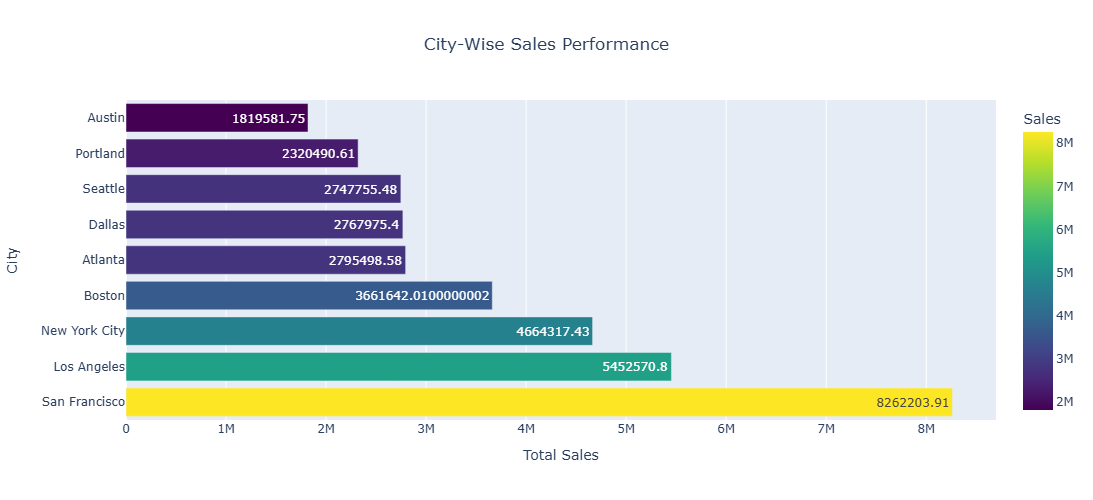

In [141]:
import plotly.express as px

fig = px.bar(Highest_city_sales, 
             x='Sales', 
             y='City', 
             title="City-Wise Sales Performance",
             color='Sales', 
             color_continuous_scale='Viridis',
             text='Sales', 
             orientation='h')  

fig.update_layout(
    xaxis_title="Total Sales",
    yaxis_title="City",
    title_x=0.5,
    width=900,  
    height=500  
)

fig.show()


## Sales by City
The top-performing cities by revenue:
1. **San Francisco** - $8.26M
   
2. **Los Angeles** - $5.45M

3. **New York City** - $4.66M

### Findings:
- San Francisco has the highest sales, likely due to its high-income population.
- Larger cities consistently generating highest sales.

In [214]:
hourly_sales = df.groupby('Hour')['Sales'].sum().reset_index()
hourly_sales

,Hour,Sales
0,0,713721.27
1,1,460866.88
2,2,234851.44
3,3,145757.89
4,4,162661.01
5,5,230679.82
6,6,448113.00
7,7,744854.12
8,8,1192348.97
9,9,1639030.58


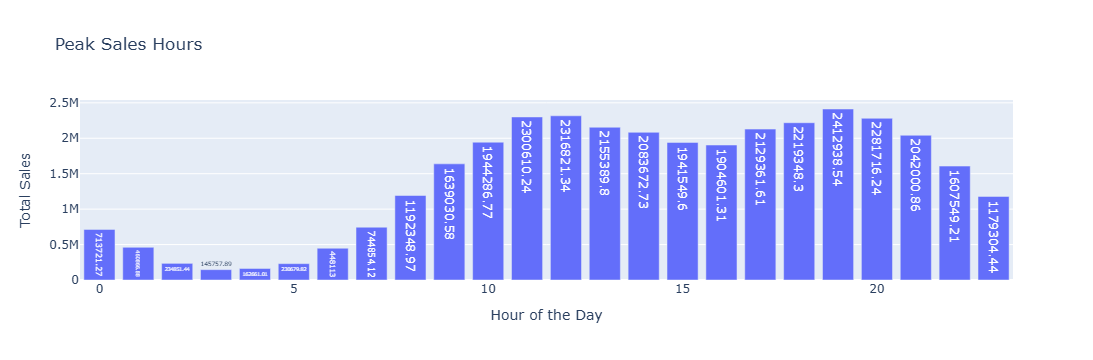

In [146]:
hourly_sales = df.groupby('Hour')['Sales'].sum().reset_index()

# Plot bar chart for peak sales hours
fig = px.bar(hourly_sales, x='Hour', y='Sales', 
             title="Peak Sales Hours", text='Sales')

fig.update_layout(xaxis_title="Hour of the Day", yaxis_title="Total Sales")

fig.show()


##  Sales by Hour
Sales by time of day show:
- Peak sales occur between **11AM-2PM** and **6 PM - 9 PM**.
- Lowest sales occur in the early morning (before 7 AM).

### Findings:
- Post 11 and  Evening hours  are prime shopping times.
- Promotional and marketing strategies should target peak hours to maximize revenue.

In [254]:
from sklearn.linear_model import LinearRegression

df= pd.read_csv(r"C:\Users\bvssh\Downloads\Sales Data.csv")
Monthly_highest_sales = df.groupby('Month')['Sales'].sum().reset_index().sort_values('Month',ascending= False)

X = Monthly_highest_sales["Month"].values.reshape(-1, 1)
y = Monthly_highest_sales["Sales"].values

# Train the model
lr_model = LinearRegression()
lr_model.fit(X, y)

future_months = np.array(range(df["Month"].max() + 1, 
                               df["Month"].max() + 4)).reshape(-1, 1)
forecasted_sales = lr_model.predict(future_months)

forecast_df = pd.DataFrame({"Month": future_months.flatten(), "Forecasted Sales": forecasted_sales})
forecast_df




,Month,Forecasted Sales
0,13,3.716806e+06
1,14,3.846417e+06
2,15,3.976028e+06


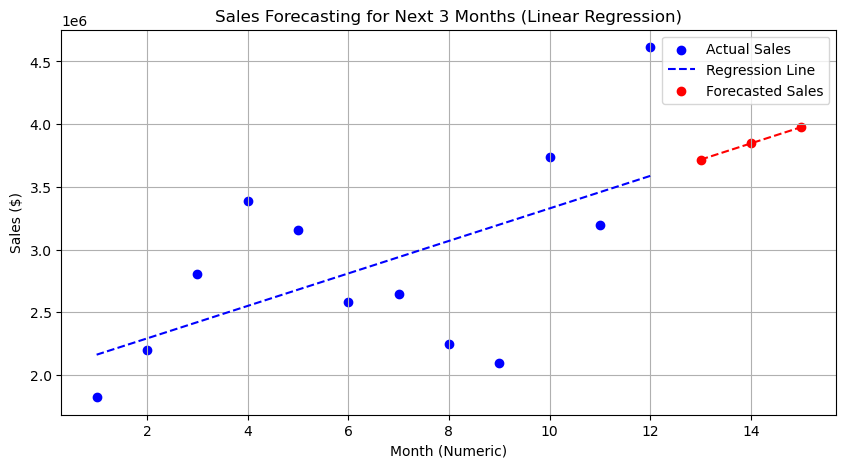

In [256]:
plt.figure(figsize=(10, 5))
plt.scatter(Monthly_highest_sales["Month"], Monthly_highest_sales["Sales"], label="Actual Sales", color='blue', marker="o")
plt.plot(Monthly_highest_sales["Month"], lr_model.predict(X), linestyle="dashed", color="blue", label="Regression Line")

plt.scatter(forecast_df["Month"], forecast_df["Forecasted Sales"], label="Forecasted Sales", color='red', marker="o")
plt.plot(forecast_df["Month"], forecasted_sales, linestyle="dashed", color="red")

plt.xlabel("Month (Numeric)")
plt.ylabel("Sales ($)")
plt.title("Sales Forecasting for Next 3 Months (Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()

##  Predictive Analysis
A predictive analysis was conducted using a linear regression model to forecast sales for the next3x months. The predicted sales figures are:

| Month | Predicted Sales ($) |
|--------|---------------------|
| 13     | 3,716,806           |
| 14     | 3,846,417           |
| 15     | 3,976,028              |

### Findings:
- The forecast indicates a steady increase in sales over the next six months.
- Strategic planning should account for this trend to optimize stock levels and marketing efforts.


## Conclusion
- Sales are highest in December, influenced by holiday shopping.
- Smartphones and accessories are top-selling products.
- Customers frequently buy accessories along with primary products.
- Major cities contribute the most to total revenue.

## Recommendations
1. **Stock Optimization**: Increase inventory for best-selling items, especially in peak sales months.
2. **Bundle Products**: Offer discounts on accessories when purchased with electronics.
3. **Targeted Marketing**: Focus advertisements on peak shopping hours and top-selling locations.
4. **Holiday Promotions**: Invest in marketing campaigns before the holiday season to capitalize on increased spending.
